In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
learn = vision_learner(dls, models.resnet50, metrics=accuracy)
learn.fine_tune(1)
learn.path = Path('.')
learn.export()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_83324\645415734.py:3: SyntaxWarning: invalid escape sequence '\d'
  dls = ImageDataLoaders.from_name_re(path, get_image_files(path/'images'), pat='(.+)_\d+.jpg', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [02:49<00:00, 607kB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.387088,0.386131,0.876861,15:05


epoch,train_loss,valid_loss,accuracy,time
0,0.447586,0.272138,0.916779,19:16


In [2]:
pip install gradio


   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
    --------------------------------------- 0.3/18.1 MB ? eta -:--:--
    --------------------------------------- 0.3/18.1 MB ? eta -:--:--
    --------------------------------------- 0.3/18.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/18.1 MB 441.3 kB/s eta 0:00:40
   - -------------------------------------- 0.5/18.1 MB 441.3 kB/s eta 0:00:40
   - -------------------------------------- 0.5/18.1 MB 441.3 kB/s eta 0:00:40
   - -------------------------------------- 0.8/18.1 MB 441.3 kB/s eta 0:00:40
   - -------------------------------------- 0.8/18.1 MB 441.3 kB/s eta 0:00:40
   -- ------------------------------------- 1.0/18.1 MB 479.2 kB/s eta 0:00:36
   -- ------------------------------

In [3]:
from fastai.vision.all import *
import gradio as gr

In [5]:
def is_cat(x): return x[0].isupper()

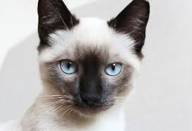

In [11]:
im = PILImage.create('pets/siamese.jpg')
im.thumbnail((192,192))
im

In [12]:
learn = load_learner('export.pkl')

In [13]:
learn.predict(im)

('Siamese',
 tensor(10),
 tensor([2.0707e-06, 4.3419e-04, 1.2808e-03, 4.8873e-05, 6.1916e-06, 2.6099e-05,
         1.5758e-07, 5.8516e-06, 2.4821e-03, 2.2713e-05, 9.9515e-01, 4.3243e-05,
         1.3955e-06, 1.5123e-04, 9.7484e-07, 8.6972e-07, 4.7374e-07, 8.2742e-05,
         4.2281e-06, 4.3503e-07, 1.2905e-05, 1.0472e-06, 5.7027e-06, 8.4989e-06,
         3.1035e-05, 4.9851e-06, 4.3355e-06, 5.8232e-07, 4.8041e-05, 5.9790e-05,
         1.0071e-05, 3.1155e-05, 1.0167e-06, 2.8097e-06, 4.9071e-06, 4.8775e-06,
         1.8622e-05]))

In [14]:
categories = ('Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier')
def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [15]:
classify_image(im)

{'Abyssinian': 2.0706593204522505e-06,
 'Bengal': 0.00043418948189355433,
 'Birman': 0.0012807954335585237,
 'Bombay': 4.887285103905015e-05,
 'British_Shorthair': 6.191605734784389e-06,
 'Egyptian_Mau': 2.609890179883223e-05,
 'Maine_Coon': 1.5757936466798128e-07,
 'Persian': 5.851604782947106e-06,
 'Ragdoll': 0.002482054755091667,
 'Russian_Blue': 2.2713296857546084e-05,
 'Siamese': 0.995154857635498,
 'Sphynx': 4.324303154135123e-05,
 'american_bulldog': 1.3955481108496315e-06,
 'american_pit_bull_terrier': 0.0001512270828243345,
 'basset_hound': 9.748425782163395e-07,
 'beagle': 8.697186331119156e-07,
 'boxer': 4.7374160772051255e-07,
 'chihuahua': 8.27421827125363e-05,
 'english_cocker_spaniel': 4.228122634231113e-06,
 'english_setter': 4.3502586777321994e-07,
 'german_shorthaired': 1.2905362382298335e-05,
 'great_pyrenees': 1.0472487019796972e-06,
 'havanese': 5.702745511371177e-06,
 'japanese_chin': 8.498856914229691e-06,
 'keeshond': 3.1035269785206765e-05,
 'leonberger': 4.985

In [24]:
#export for the model
image = gr.Image()
label = gr.Label()
examples = ['pets/dog.jpg', 'pets/cat.jpg', 'pets/cat1.jpg', 'pets/dog2.jpg', 'pets/siamese.jpg']

intf = gr.Interface(fn = classify_image, inputs = image, outputs = label, examples = examples)
intf.launch(inline = False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
